In [1]:
!which python

/Users/mcirtain/miniconda3/envs/nlp/bin/python


In [2]:
import pandas as pd
import numpy as np

In [8]:
data = '../../data/big_data_all_annotations.20230501.2113.json'
df = pd.read_json(data)
df.head()

,conversation_id,lang,reply_settings,created_at,clean_text,text,author_id,referenced_tweets,id,edit_history_tweet_ids,...,roberta_content,roberta_polarity,roberta_sentiment,keyword,normalized_roberta_polarity,textblob_label,vader_label,AFINN_label,SentiWordNet_label,roberta_label
0,1633954063934009344,en,everyone,2023-03-09 22:13:00,rt infantry_bucky hes lucky a #chrisrocklive ...,RT @Infantry_bucky: He’s lucky a #ChrisRockLiv...,1519164980582653952,"[{'type': 'retweeted', 'id': '1633938373529292...",1633954063934009344,['1633954063934009354'],...,RT @user He’s lucky a #ChrisRockLive was the w...,-0.635149,negative,#chrisrocklive,0.072673,neutral,negative,neutral,neutral,negative
1,1633954058212876288,en,everyone,2023-03-09 22:12:59,rt 1_ofakindnocap chris rock we all been chea...,RT @1_ofakindnocap: Chris Rock: “we all been c...,21575184,"[{'type': 'retweeted', 'id': '1632283297588948...",1633954058212876288,['1633954058212876289'],...,RT @user Chris Rock: “we all been cheated on.....,-0.635149,negative,#chrisrocklive,0.072673,neutral,negative,negative,negative,negative
2,1633951267423768576,en,everyone,2023-03-09 22:01:54,rt 1_ofakindnocap chris rock we all been chea...,RT @1_ofakindnocap: Chris Rock: “we all been c...,360633018,"[{'type': 'retweeted', 'id': '1632283297588948...",1633951267423768576,['1633951267423768578'],...,RT @user Chris Rock: “we all been cheated on.....,-0.635149,negative,#chrisrocklive,0.072673,neutral,negative,negative,negative,negative
3,1633950853626318848,en,everyone,2023-03-09 22:00:15,rt rolandsmartin working out and watching the...,RT @rolandsmartin: Working out and watching th...,1547101103803830272,"[{'type': 'retweeted', 'id': '1632825595473149...",1633950853626318848,['1633950853626318850'],...,RT @user Working out and watching the @user @u...,0.388473,positive,#chrisrocklive,0.754342,neutral,positive,neutral,neutral,positive
4,1633950824664645632,en,everyone,2023-03-09 22:00:08,rt rolandsmartin workout done ill have a few ...,RT @rolandsmartin: Workout done. I’ll have a f...,1547101103803830272,"[{'type': 'retweeted', 'id': '1632833853021728...",1633950824664645632,['1633950824664645634'],...,RT @user Workout done. I’ll have a few comment...,0.168381,neutral,#chrisrocklive,0.607774,neutral,positive,neutral,neutral,neutral


In [10]:
print(df.columns)
cols = [x for x in df.columns if 'label' in x or 'sentiment' in x]
df[cols].head()

Index(['conversation_id', 'lang', 'reply_settings', 'created_at', 'clean_text',
       'text', 'author_id', 'referenced_tweets', 'id',
       'edit_history_tweet_ids', 'public_metrics.retweet_count',
       'public_metrics.reply_count', 'public_metrics.like_count',
       'public_metrics.impression_count', 'in_reply_to_user_id',
       'geo.place_id', 'withheld.copyright', 'withheld.country_codes',
       'geo.coordinates.type', 'geo.coordinates.coordinates',
       'textblob_Polarity', 'textblob_Subjectivity', 'vader_Polarity',
       'vader_Subjectivity', 'AFINN_scores', 'AFINN_sentiments',
       'SentiWordNet_scores', 'normalized_textblob_Polarity',
       'normalized_textblob_Subjectivity', 'normalized_vader_Polarity',
       'normalized_vader_Subjectivity', 'normalized_AFINN_scores',
       'normalized_SentiWordNet_scores', 'our_label', 'annotator',
       'roberta_content', 'roberta_polarity', 'roberta_sentiment', 'keyword',
       'normalized_roberta_polarity', 'textblob_label'

,AFINN_sentiments,our_label,roberta_sentiment,textblob_label,vader_label,AFINN_label,SentiWordNet_label,roberta_label
0,negative,None,negative,neutral,negative,neutral,neutral,negative
1,negative,None,negative,neutral,negative,negative,negative,negative
2,negative,None,negative,neutral,negative,negative,negative,negative
3,neutral,None,positive,neutral,positive,neutral,neutral,positive
4,neutral,None,neutral,neutral,positive,neutral,neutral,neutral


In [13]:
df[[x for x in df.columns if 'AFINN' in x]].head()

,AFINN_scores,AFINN_sentiments,normalized_AFINN_scores,AFINN_label
0,-2,negative,0.448980,neutral
1,-6,negative,0.367347,negative
2,-6,negative,0.367347,negative
3,0,neutral,0.489796,neutral
4,0,neutral,0.489796,neutral


In [17]:
df['roberta_polarity'].head()
[x for x in df.columns if 'normal' in x]

['normalized_textblob_Polarity',
 'normalized_textblob_Subjectivity',
 'normalized_vader_Polarity',
 'normalized_vader_Subjectivity',
 'normalized_AFINN_scores',
 'normalized_SentiWordNet_scores',
 'normalized_roberta_polarity']

In [19]:
score_cols = ['normalized_textblob_Polarity',
 'normalized_vader_Polarity',
 'normalized_AFINN_scores',
 'normalized_SentiWordNet_scores',
 'normalized_roberta_polarity']

df[score_cols].head()
df[score_cols].corr()

,normalized_textblob_Polarity,normalized_vader_Polarity,normalized_AFINN_scores,normalized_SentiWordNet_scores,normalized_roberta_polarity
normalized_textblob_Polarity,1.000000,0.440644,0.461542,0.377246,0.395069
normalized_vader_Polarity,0.440644,1.000000,0.827546,0.390117,0.497484
normalized_AFINN_scores,0.461542,0.827546,1.000000,0.388647,0.485962
normalized_SentiWordNet_scores,0.377246,0.390117,0.388647,1.000000,0.266572
normalized_roberta_polarity,0.395069,0.497484,0.485962,0.266572,1.000000


In [15]:

#df[['AFINN_sentiments', 'AFINN_label', 'roberta_label']].corr()
score_cols = [x for x in df.columns if 'score' in x]
score_cols

['AFINN_scores',
 'SentiWordNet_scores',
 'normalized_AFINN_scores',
 'normalized_SentiWordNet_scores']

['our_label', 'textblob_label', 'vader_label', 'AFINN_label', 'SentiWordNet_label', 'roberta_label']
(1000, 6)


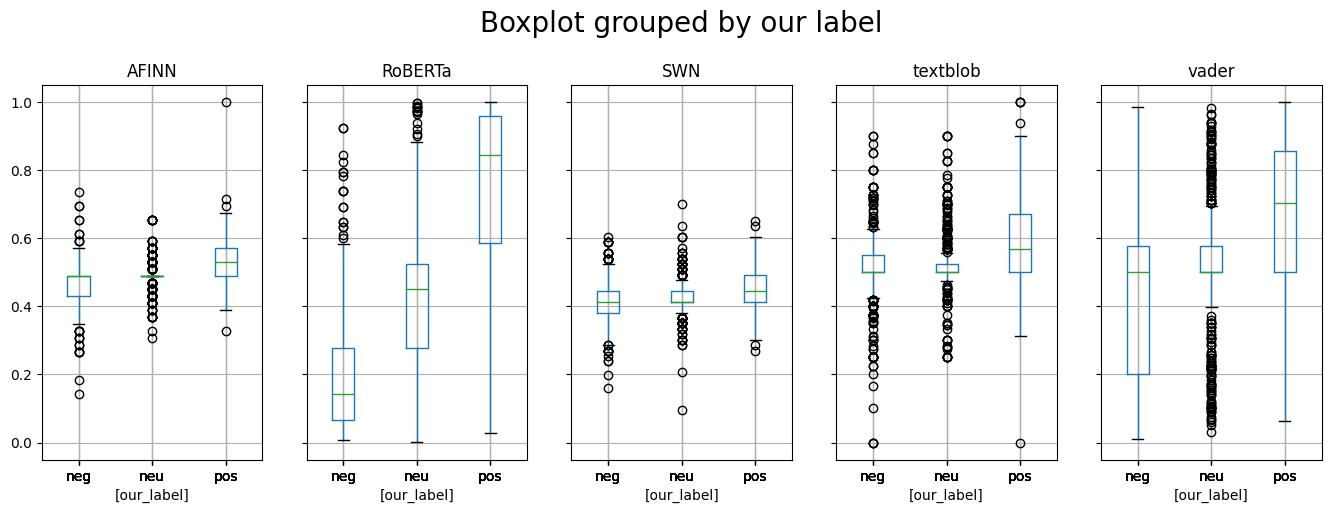

In [61]:
import matplotlib.pyplot as plt

annot_df = df.loc[~df['our_label'].isna()]
annot_df.shape

annot_cols = [c for c in df.columns if '_label' in c]
print(annot_cols)

plot_df = annot_df[['normalized_textblob_Polarity',
 'normalized_vader_Polarity',
 'normalized_AFINN_scores',
 'normalized_SentiWordNet_scores',
 'normalized_roberta_polarity', 'our_label']]
plot_df.columns = ['textblob','vader','AFINN', 'SWN','RoBERTa', 'our_label']
plot_df.loc[plot_df['our_label'] == 'negative', 'our_label'] = 'neg'
plot_df.loc[plot_df['our_label'] == 'neutral', 'our_label'] = 'neu'
plot_df.loc[plot_df['our_label'] == 'positive', 'our_label'] = 'pos'
print(plot_df.shape)
ax = plot_df.boxplot(layout=(1,5), figsize=(16,5), by='our_label', xlabel='')
#ax.xlabel('')
#plt.title('XYZ Boxplot grouped by our label', fontsize=20)
t = plt.suptitle('Boxplot grouped by our label\n', fontsize=20)
t.set_y(1.05)
#plt.xlabel('')
plt.show()

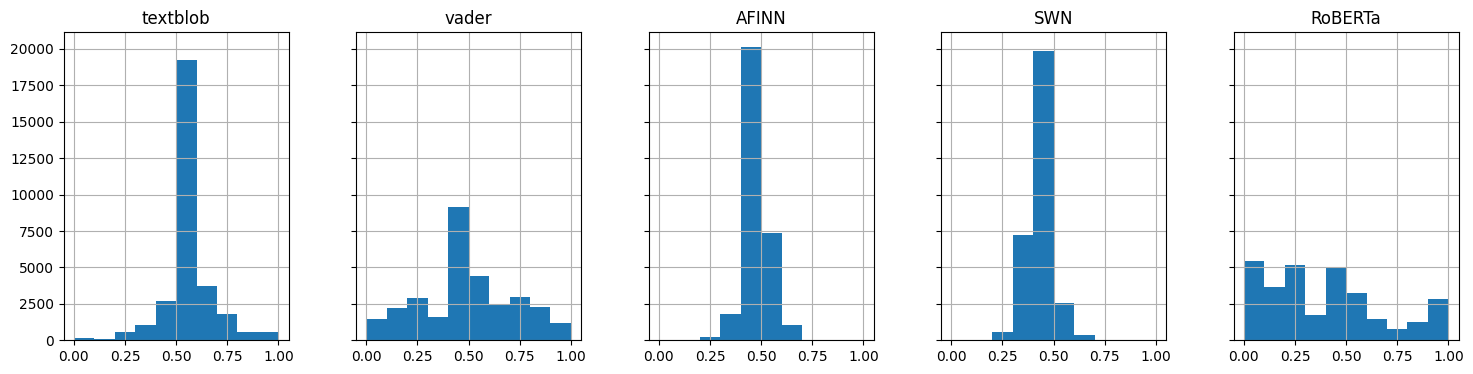

In [73]:
plot_df = df[['normalized_textblob_Polarity',
 'normalized_vader_Polarity',
 'normalized_AFINN_scores',
 'normalized_SentiWordNet_scores',
 'normalized_roberta_polarity']]
#plot_df.columns = ['textblob','vader','AFINN', 'SWN','RoBERTa', 'our_label']
plot_df.columns = ['textblob','vader','AFINN', 'SWN','RoBERTa']
plot_df.hist(layout=(1,5), figsize=(18,4), sharey=True)
plt.show()

In [37]:
import seaborn as sns

#sns.boxplot(x="our_label", y="value", data=plot_df.melt(plot_df))
# ax1=sns.boxplot(data=df,x='Theme',y='assent', palette = palette_color)
# ax1.set_title("TWITTER: Spoken Categories Distribution by Theme",fontweight='bold')
sns.boxplot(data=plot_df, x='our_label', y=plot_df.melt(plot_df[score_cols]))

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

,normalized_textblob_Polarity,normalized_vader_Polarity,normalized_AFINN_scores,normalized_SentiWordNet_scores,normalized_roberta_polarity,variable,value
0,0.625000,0.349253,0.428571,0.507937,0.289530,our_label,negative
1,0.623918,0.781464,0.469388,0.412698,0.853285,our_label,neutral
2,0.500000,0.576703,0.489796,0.412698,0.277563,our_label,neutral
3,0.500000,0.576703,0.489796,0.412698,0.277563,our_label,neutral
4,0.500000,0.576703,0.489796,0.412698,0.277563,our_label,neutral
...,...,...,...,...,...,...,...
995,0.500000,0.795898,0.551020,0.444444,0.555416,our_label,neutral
996,0.850000,0.871461,0.571429,0.396825,0.455734,our_label,negative
997,0.500000,0.202431,0.428571,0.412698,0.162327,our_label,neutral
998,0.550000,0.447151,0.408163,0.317460,0.389993,our_label,negative


In [67]:
from itertools import combinations
i = 0
for r2 in range(1,5):
    for c in combinations([1,2,3,4,5], r2):
        i += 1
        print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
